# INTRODUCTION

With Recurrent Neural Networks, which is better for forecasting series of values. We are going to find out if we can predict a simple math function.

# LIBRARIES AND CREATION OF THE DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.linspace(0,50,501)
y = np.sin(x)

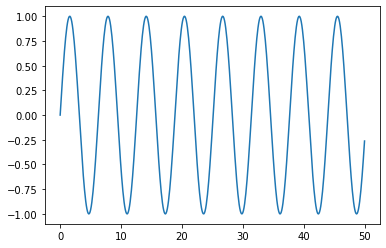

In [3]:
plt.plot(x,y)

Creation of the Data Frame

In [4]:
df = pd.DataFrame(data = y, index = x, columns = ["Sine"])
df.head()

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418


Next, let's separate the dataset into the test and the training datasets

In [5]:
len(df)

501

In [6]:
test_percent = 0.1

In [7]:
len(df)*test_percent

50.1

In [8]:
test_point = np.round(len(df)*test_percent)
test_point

50.0

In [9]:
test_ind = int(len(df)-test_point)
test_ind

451

In [10]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [11]:
print(len(train))
print(len(test))

451
50


# PRE PROCESSING

We are going to convert those values into a lower numbers but keeping the same distance between them.

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
scaler.fit(train)

MinMaxScaler()

In [15]:
scaled_train = scaler.transform(train)

In [16]:
scaled_test = scaler.transform(test)

# CREATING THE MODEL

In [17]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [18]:
length = 2
batch_size = 1

generator = TimeseriesGenerator(scaled_train, scaled_train, length = length, 
                                batch_size = batch_size)

In [19]:
print(len(scaled_train))
print(len(generator))

451
449


A little DL model that can predict the next number.

In [20]:
X,y = generator[0]

In [21]:
print("According to this array: ", X)
print("*********")
print("The next possible number is: ",y)

According to this array:  [[[0.49999912]
  [0.54991622]]]
*********
The next possible number is:  [[0.59933458]]


In [22]:
length = 50
batch_size = 1

generator = TimeseriesGenerator(scaled_train, scaled_train, length = length, 
                                batch_size = batch_size)

# FEATURES OF THE MODEL

For this one, we will use just one hidden layer with a compile which optimizer is going to be Adam on the loss metrics will be use MSE.

The hidden layer is a SimpleRNN layer which is a type of recurrent neural network that has a simple architecture and is used for sequence prediction tasks, such as natural language processing and time series analysis.

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [24]:
n_features = 1

In [25]:
model = Sequential()

model.add(SimpleRNN(50, input_shape = (length, n_features)))

model.add(Dense(1))

model.compile(optimizer = "adam", loss = "mse")

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


# TRAINING THE MODEL

In [27]:
model.fit_generator(generator, epochs =5)

Epoch 1/5


C:\Users\ulise\AppData\Local\Temp/ipykernel_33232/2500511877.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs =5)


401/401 [==============================] - 5s 8ms/step - loss: 0.0098
Epoch 2/5
401/401 [==============================] - 3s 8ms/step - loss: 9.6040e-05
Epoch 3/5
401/401 [==============================] - 3s 8ms/step - loss: 2.5953e-04
Epoch 4/5
401/401 [==============================] - 3s 8ms/step - loss: 1.6382e-04
Epoch 5/5
401/401 [==============================] - 3s 8ms/step - loss: 6.1888e-05


# PLOT OF THE RESULT EVOLUTION

In [28]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

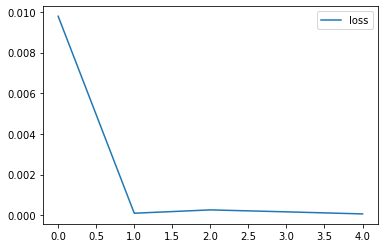

In [29]:
losses.plot()

# TAKING A SAMPLE AND MAKING PREDICTIONS

In [30]:
first_eval_batch = scaled_train[-length:]
first_eval_batch

array([[8.37405820e-01],
       [7.98881698e-01],
       [7.57371240e-01],
       [7.13289205e-01],
       [6.67076045e-01],
       [6.19193508e-01],
       [5.70120021e-01],
       [5.20345908e-01],
       [4.70368497e-01],
       [4.20687145e-01],
       [3.71798252e-01],
       [3.24190300e-01],
       [2.78338972e-01],
       [2.34702398e-01],
       [1.93716581e-01],
       [1.55791039e-01],
       [1.21304709e-01],
       [9.06021693e-02],
       [6.39901882e-02],
       [4.17346643e-02],
       [2.40579672e-02],
       [1.11367167e-02],
       [3.10001778e-03],
       [2.81703720e-05],
       [1.95186738e-03],
       [8.85188786e-03],
       [2.06592891e-02],
       [3.72560954e-02],
       [5.84764771e-02],
       [8.41084070e-02],
       [1.13895779e-01],
       [1.47540969e-01],
       [1.84707803e-01],
       [2.25024924e-01],
       [2.68089497e-01],
       [3.13471233e-01],
       [3.60716695e-01],
       [4.09353821e-01],
       [4.58896644e-01],
       [5.08850150e-01],


In [31]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

The prediction is pretty close.

In [32]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 235ms/step


array([[0.9458993]], dtype=float32)

In [33]:
scaled_test[0]

array([0.94955134])

Now we are going to do the same but with the whole test dataset.

In [34]:
test_pre = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_pre.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis = 1)


1/1 [==============================] - 0s 22ms/step


In [35]:
test_pre

[array([0.9458993], dtype=float32),
 array([0.9647481], dtype=float32),
 array([0.9787675], dtype=float32),
 array([0.98876643], dtype=float32),
 array([0.9934811], dtype=float32),
 array([0.9917274], dtype=float32),
 array([0.98546964], dtype=float32),
 array([0.9742142], dtype=float32),
 array([0.9590019], dtype=float32),
 array([0.9394459], dtype=float32),
 array([0.9136837], dtype=float32),
 array([0.882974], dtype=float32),
 array([0.8473337], dtype=float32),
 array([0.80895066], dtype=float32),
 array([0.76839834], dtype=float32),
 array([0.72455436], dtype=float32),
 array([0.678394], dtype=float32),
 array([0.62893414], dtype=float32),
 array([0.57867545], dtype=float32),
 array([0.52810585], dtype=float32),
 array([0.47680044], dtype=float32),
 array([0.42565733], dtype=float32),
 array([0.37340033], dtype=float32),
 array([0.32172248], dtype=float32),
 array([0.27178043], dtype=float32),
 array([0.22392271], dtype=float32),
 array([0.17982213], dtype=float32),
 array([0.13746

In [36]:
scaled_test

array([[9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],
       [7.50127132e-01],
       [7.05655314e-01],
       [6.59128649e-01],
       [6.11012013e-01],
       [5.61786173e-01],
       [5.11942978e-01],
       [4.61980443e-01],
       [4.12397778e-01],
       [3.63690397e-01],
       [3.16344967e-01],
       [2.70834550e-01],
       [2.27613868e-01],
       [1.87114770e-01],
       [1.49741909e-01],
       [1.15868702e-01],
       [8.58335998e-02],
       [5.99367021e-02],
       [3.84367625e-02],
       [2.15486014e-02],
       [9.44095974e-03],
       [2.23481297e-03],
       [2.16257798e-06],
       [2.76531647e-03],
       [1.04966661e-02],
       [2.31189624e-02],


In [37]:
true_predictions = scaler.inverse_transform(test_pre)
true_predictions

array([[ 0.89179323],
       [ 0.92949048],
       [ 0.95752911],
       [ 0.97752679],
       [ 0.98695605],
       [ 0.9834487 ],
       [ 0.97093325],
       [ 0.94842255],
       [ 0.9179982 ],
       [ 0.87888654],
       [ 0.82736255],
       [ 0.76594368],
       [ 0.69466365],
       [ 0.61789813],
       [ 0.53679415],
       [ 0.44910688],
       [ 0.35678694],
       [ 0.25786799],
       [ 0.1573514 ],
       [ 0.05621303],
       [-0.04639698],
       [-0.14868237],
       [-0.25319554],
       [-0.35655042],
       [-0.45643371],
       [-0.55214837],
       [-0.64034883],
       [-0.72505273],
       [-0.80264555],
       [-0.8725694 ],
       [-0.93444043],
       [-0.98367321],
       [-1.02576781],
       [-1.05710606],
       [-1.07922352],
       [-1.0918161 ],
       [-1.08895223],
       [-1.07793294],
       [-1.05339814],
       [-1.01936197],
       [-0.97761518],
       [-0.91978786],
       [-0.85668507],
       [-0.77971204],
       [-0.69811906],
       [-0

# LET'S PLOT ALL THE PREDICTIONS

In [38]:
test["Predictions"] = true_predictions

C:\Users\ulise\AppData\Local\Temp/ipykernel_33232/3424149773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Predictions"] = true_predictions


<AxesSubplot:>

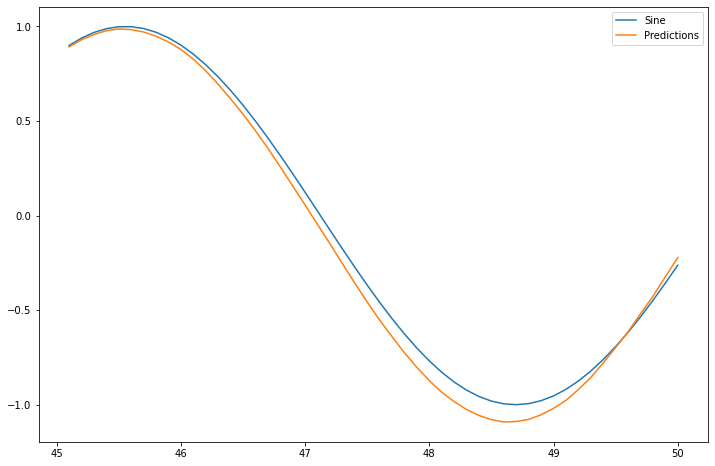

In [39]:
test.plot(figsize=(12,8))

We need to implement an Early Stopping to improve our model.

In [42]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = "val_loss", patience = 2)

In [45]:
length = 49
generator = TimeseriesGenerator(scaled_train, scaled_train, length= length, batch_size=1)

In [46]:
validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length = length, batch_size=1)

# CREATING AGAIN THE MODEL BUT WITH A DIFFERENT RECURRENT NEURAL NETWORK

Now these one is the same but with the LSTM model. LSTM is a type of recurrent neural network (RNN) that is commonly used for sequence prediction tasks, such as natural language processing and time series analysis. LSTM networks are designed to address the problem of vanishing gradients that can occur in traditional RNNs, which can make it difficult for the network to learn long-term dependencies in the input sequence.

In [47]:
model = Sequential()

model.add(LSTM(50, input_shape = (length, n_features)))

model.add(Dense(1))

model.compile(optimizer = "adam", loss = "mse")

In [52]:
model.fit_generator(generator, epochs = 20, validation_data=validation_generator, callbacks=[early_stop])

Epoch 1/20


C:\Users\ulise\AppData\Local\Temp/ipykernel_33232/1624144228.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs = 20, validation_data=validation_generator, callbacks=[early_stop])


402/402 [==============================] - 7s 13ms/step - loss: 0.0240 - val_loss: 1.6875e-04
Epoch 2/20
402/402 [==============================] - 6s 16ms/step - loss: 1.6057e-04 - val_loss: 1.6515e-07
Epoch 3/20
402/402 [==============================] - 7s 16ms/step - loss: 1.2262e-04 - val_loss: 6.3579e-05
Epoch 4/20
402/402 [==============================] - 6s 16ms/step - loss: 3.8678e-04 - val_loss: 3.2577e-05


Creating again the predictons.

In [53]:
test_pre = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_pre.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis = 1)

1/1 [==============================] - 0s 27ms/step


In [58]:
true_predictions = scaler.inverse_transform(test_pre)
test["LSTM Predictions"] = true_predictions

C:\Users\ulise\AppData\Local\Temp/ipykernel_33232/167926812.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["LSTM Predictions"] = true_predictions


<AxesSubplot:>

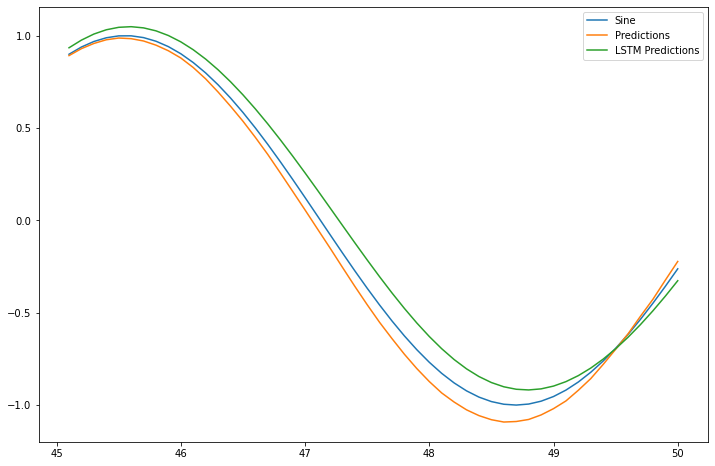

In [64]:
test.plot(figsize=(12,8))

In [66]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [70]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = 1)

In [71]:
model = Sequential()

model.add(LSTM(50, input_shape = (length, n_features)))

model.add(Dense(1))

model.compile(optimizer = "adam", loss = "mse")

In [73]:
model.fit_generator(generator, epochs = 6)

Epoch 1/6


C:\Users\ulise\AppData\Local\Temp/ipykernel_33232/3666391922.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs = 6)


452/452 [==============================] - 10s 18ms/step - loss: 0.0106
Epoch 2/6
452/452 [==============================] - 6s 14ms/step - loss: 1.9323e-04
Epoch 3/6
452/452 [==============================] - 6s 14ms/step - loss: 9.6775e-04
Epoch 4/6
452/452 [==============================] - 7s 16ms/step - loss: 9.0169e-05
Epoch 5/6
452/452 [==============================] - 9s 20ms/step - loss: 2.8613e-05
Epoch 6/6
452/452 [==============================] - 10s 23ms/step - loss: 6.1053e-05


# MAKING PREDICTIONS

In [74]:
forecast = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(25):
    current_pred = model.predict(current_batch)[0]
    forecast.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis = 1)

1/1 [==============================] - 0s 21ms/step


In [75]:
forecast = scaler.inverse_transform(forecast)

In [77]:
forecast

array([[ 0.90450405],
       [ 0.94322125],
       [ 0.97242729],
       [ 0.99183584],
       [ 1.0012533 ],
       [ 1.00061935],
       [ 0.98999538],
       [ 0.96955556],
       [ 0.93957288],
       [ 0.90040734],
       [ 0.85249513],
       [ 0.79633692],
       [ 0.73249096],
       [ 0.6615651 ],
       [ 0.5842126 ],
       [ 0.50112928],
       [ 0.41305077],
       [ 0.32075217],
       [ 0.22504898],
       [ 0.12679425],
       [ 0.02687979],
       [-0.07376679],
       [-0.17418455],
       [-0.27338353],
       [-0.37035379]])

In [78]:
forecast_index=np.arange(50.1,52.6, step=0.1)

In [81]:
print(len(forecast_index))
print(len(forecast))

25
25


# RESULTS

This is the forecast of this math function. There is not way to get numerical metrics will that time happend. But we can see that has the same shape.

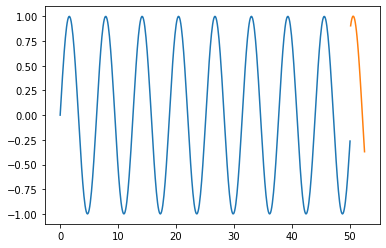

In [82]:
plt.plot(df.index,df["Sine"])
plt.plot(forecast_index, forecast)